In [414]:
import os
import pandas as pd
import glob
import re
import numpy as np
import datetime
import matplotlib.pyplot as plt
import calendar
from consts import *
import seaborn as sns


In [415]:
buildings_from_cumu = pd.read_json(DATA_DIR.joinpath("cumu_buildings_meta_data.json"))
buildings_from_cumu_meta_data = pd.DataFrame(buildings_from_cumu[buildings_from_cumu["data_domain"] == "electricity"]["buildings"].to_list()[0])

In [416]:
buildings_from_cumu_meta_data

,id,dal_location_groupingTag,name,dal_location_address,match_score,match_duplicate,LAHIAADRESS,ADS_OID,ETAK_ID,VIITEPUNKT_X,VIITEPUNKT_Y,data_domain,match_lat,match_lon,c8y_Position_lat,c8y_Position_lng
0,425582407,TÄHE 2,Kogu elektritarbimine,"Tähe tn 2, Tartu linn, Tartu linn, Tartu maakond",NaN,None,Tähe tn 2,EE01936470,716647.0,659402.17,6473608.30,electricity,58.373820,26.725007,None,None
1,311680861,ALEKSANDRI 3,Maja elektri kuutarbimine,Aleksandri 3,0.040000,False,Aleksandri tn 3,EE00750826,720043.0,659628.97,6473845.96,electricity,58.375869,26.729045,None,None
2,540121837,ALEKSANDRI 12,Maja elektri kuutarbimine,Aleksandri 12,0.037500,False,Aleksandri tn 12,EE00750871,721107.0,659802.05,6473709.08,electricity,58.374578,26.731905,None,None
3,311680860,J.KUPERJANOVI 2,Maja elektri kuutarbimine,J.Kuperjanovi 2,0.056140,False,J. Kuperjanovi tn 2,EE01653334,720448.0,658796.70,6473871.01,electricity,58.376397,26.714849,None,None
4,311680865,KALEVI 8,Maja elektri kuutarbimine,Kalevi 8,0.054545,False,Kalevi tn 8,EE00750779,720592.0,659586.21,6473804.87,electricity,58.375516,26.728286,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,257918291,ELEKTER - TARTU LV,"38ZEE-00638092-U Tartu, Raekoja plats, 3 elect...","Tartu, Raekoja plats, 3",0.232298,False,Taara pst 1a-3,ER01420583,NaN,658379.48,6474280.09,electricity,58.380218,26.708006,None,None
101,265281745,ELEKTER - TARTU LV,Lubja 7 soojus ja elekter,"Tartu, Lubja tn, 7",0.220606,False,Turu tn 5-7,ER01500242,NaN,659742.12,6473907.12,electricity,58.376376,26.731020,None,None
102,1061406833,ELEKTER - TARTU LINNAVALITSUS,Elekter - Tartu LV (konsolideeritud),Tartu,0.198788,False,Talutare tn,LP00017070,NaN,662855.35,6470390.26,electricity,58.343679,26.781692,None,None
103,1061410453,ELEKTER - TARTU LINNAVALITSUS,Elekter - Tartu LV (konsolideeritud),Tart,0.177778,False,Taara pst 40,EE00773326,719055.0,657822.34,6474579.30,electricity,58.383104,26.698696,None,None


In [417]:
buildings_from_cumu_meta_data.drop(columns=["dal_location_groupingTag", "match_score", "match_duplicate", "VIITEPUNKT_X", "VIITEPUNKT_Y", "data_domain", "c8y_Position_lat", "c8y_Position_lng"], inplace=True)

In [418]:
buildings_from_cumu_meta_data["name"].value_counts()

name
Maja elektri kuutarbimine                               16
38ZEE-00664819-4 Kalda tee 43b electricity.o             2
38ZEE-00394498-Z Riia tänav 29a electricity.o            2
38ZEE-00664851-C Võru Võru-Sepa electricity.o            2
38ZEE-00664849-T Riia Ravila ristmik electricity.o       2
                                                        ..
38ZEE-00647460-R Linda tänav 16 - 8 electricity.o        1
38ZEE-00658082-K Lossi tänav 34 - 10/C electricity.o     1
38ZEE-00659889-R Kesk tänav 28 - 3 electricity.o         1
38ZEE-00676091-H Vaksali tänav 29 - 1 electricity.o      1
Tartu Linnavalitsuse summaarne elektritarbimine          1
Name: count, Length: 72, dtype: int64

In [419]:
buildings_from_cumu_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    105 non-null    object 
 1   name                  105 non-null    object 
 2   dal_location_address  105 non-null    object 
 3   LAHIAADRESS           105 non-null    object 
 4   ADS_OID               105 non-null    object 
 5   ETAK_ID               42 non-null     float64
 6   match_lat             105 non-null    float64
 7   match_lon             105 non-null    float64
dtypes: float64(3), object(5)
memory usage: 6.7+ KB


In [420]:
buildings_from_cumu_meta_data["LAHIAADRESS"].unique().size

83

In [421]:
files_paths = [str(file_path) for file_path in DATA_DIR.joinpath(DATA_DIR, "consumption_input").glob("*.csv") if re.match(r'.*electricity.*\.csv', file_path.name)]

In [422]:
files_paths.sort()

In [423]:
def parse_filename(filename):
    return filename.split("_")

In [424]:
def read_file(file):
    dataframe = pd.read_csv(file)
    if dataframe.empty:
        result = pd.DataFrame(np.nan, index=[0], columns=dataframe.columns)
    else:
        result = dataframe.copy()

    filename = os.path.basename(file)
    
    result["filename"] = filename
    if not dataframe.empty:
        result["id"] = parse_filename(filename)[4]

    return result

In [425]:
consumption = pd.concat(map(read_file, files_paths), ignore_index=True)

In [426]:
consumption["unit"].value_counts()

unit
kWh    2031996
kwh     104970
Name: count, dtype: int64

In [427]:
consumption.drop(columns=["source", "device_name", "unit"], inplace=True)
consumption.rename(columns={"value": "value_kwh"}, inplace=True)

In [428]:
consumption

,time,fragment.series,value_kwh,filename,id
0,NaN,NaN,NaN,data_electricity_EE00747913_718658_697182394_2...,NaN
1,2021-06-17T22:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394
2,2021-06-17T23:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394
3,2021-06-18T00:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394
4,2021-06-18T01:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394
...,...,...,...,...,...
2140166,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391
2140167,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391
2140168,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391
2140169,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391


In [429]:
consumption["etak_id"] = consumption["filename"].str.split("_").str.get(3)
consumption["address_id"] = consumption["filename"].str.split("_").str.get(2)

In [430]:
consumption["address_id"].unique().size

83

In [431]:
datetime_column = pd.to_datetime(consumption['time']).dt
consumption["month"] = datetime_column.month.astype('Int64')
consumption["day"] = datetime_column.day.astype('Int64')
consumption

,time,fragment.series,value_kwh,filename,id,etak_id,address_id,month,day
0,NaN,NaN,NaN,data_electricity_EE00747913_718658_697182394_2...,NaN,718658,EE00747913,<NA>,<NA>
1,2021-06-17T22:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17
2,2021-06-17T23:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17
3,2021-06-18T00:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18
4,2021-06-18T01:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18
...,...,...,...,...,...,...,...,...,...
2140166,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30
2140167,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30
2140168,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30
2140169,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30


In [432]:
def get_year(filename):
    start_date = parse_filename(filename)[5]
    return int(start_date.split("-")[0])

get_year_vectorized = np.vectorize(get_year)

In [433]:
consumption["year"] = get_year_vectorized(consumption.filename)

In [434]:
files_numbers = consumption[["filename", "year"]].drop_duplicates()["year"].value_counts()
files_numbers

year
2020    105
2021    105
2022    105
Name: count, dtype: int64

In [435]:
consumption = consumption[~(consumption["id"].notna() & consumption["time"].isna())]

### Empty files

In [436]:
empty_files_numbers = consumption[consumption["time"].isna()]["year"].value_counts()
empty_files_numbers

year
2020    85
2022    32
2021    18
Name: count, dtype: int64

In [437]:
total = files_numbers.values.sum() - empty_files_numbers.values.sum()
print(f"Total number of files that can be processed: {total}")

Total number of files that can be processed: 180


In [438]:
years = empty_files_numbers.index.to_list()
for year in years:
    print(f"{empty_files_numbers[year] / files_numbers[year] * 100:.2f}% of the files for {year} are empty.")

print(f"{empty_files_numbers.sum() / files_numbers.sum() * 100:.2f}% of the total number of files are empty.")

80.95% of the files for 2020 are empty.
30.48% of the files for 2022 are empty.
17.14% of the files for 2021 are empty.
42.86% of the total number of files are empty.


In [439]:
years.sort()

In [440]:
year_labels = []
empty_percentage = []

for year in years:
    percentage = empty_files_numbers[year] / files_numbers[year] * 100
    empty_percentage.append(percentage)
    year_labels.append(str(year))


In [441]:
empty_percentage.reverse()
year_labels.reverse()

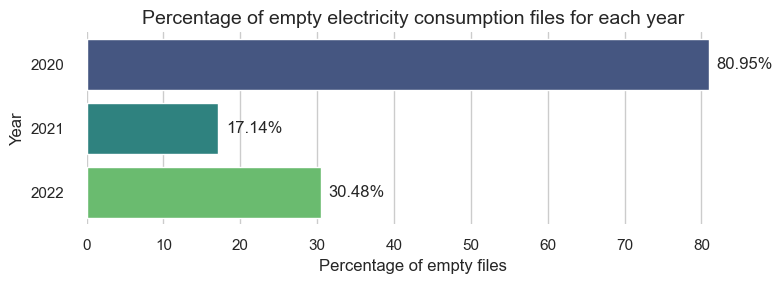

In [442]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(8, 3))

sns.barplot(x=empty_percentage, y=year_labels, palette='viridis_r')

for index, value in enumerate(empty_percentage):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12)

sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

plt.title('Percentage of empty electricity consumption files for each year', fontsize=14)
plt.xlabel('Percentage of empty files', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

In [443]:
consumption_without_nan = consumption.dropna(axis=0)

In [444]:
consumption_without_nan

,time,fragment.series,value_kwh,filename,id,etak_id,address_id,month,day,year
1,2021-06-17T22:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17,2021
2,2021-06-17T23:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17,2021
3,2021-06-18T00:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
4,2021-06-18T01:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
5,2021-06-18T02:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
...,...,...,...,...,...,...,...,...,...,...
2140166,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140167,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140168,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140169,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022


In [445]:
consumption_without_nan["address_id"].unique().size

82

In [446]:
set(consumption["address_id"].unique()) - set(consumption_without_nan["address_id"].unique())

{'EE00773326'}

In [447]:
consumption[consumption["address_id"] == "EE00773326"]

,time,fragment.series,value_kwh,filename,id,etak_id,address_id,month,day,year
326572,NaN,NaN,NaN,data_electricity_EE00773326_719055_1061410453_...,NaN,719055,EE00773326,<NA>,<NA>,2020
326573,NaN,NaN,NaN,data_electricity_EE00773326_719055_1061410453_...,NaN,719055,EE00773326,<NA>,<NA>,2021
326574,NaN,NaN,NaN,data_electricity_EE00773326_719055_1061410453_...,NaN,719055,EE00773326,<NA>,<NA>,2022


### Looking at consumption values for different types of series

In [448]:
consumption_without_nan["fragment.series"].value_counts()

fragment.series
electricity.o    1997939
group.value        89041
value.value        42935
dal.series          3773
Name: count, dtype: int64

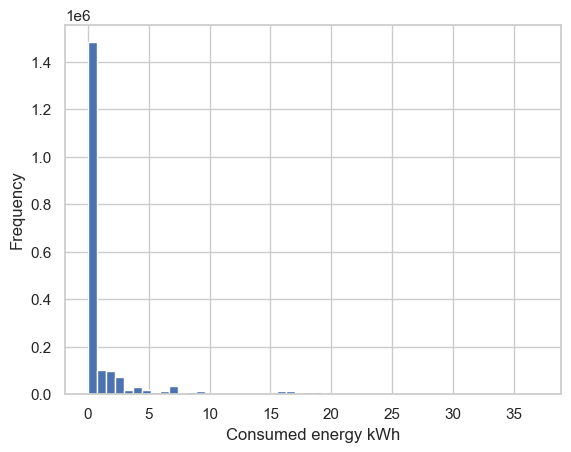

In [449]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "electricity.o"]["value_kwh"].plot.hist(bins=50)
plt.xlabel('Consumed energy kWh')
plt.show()

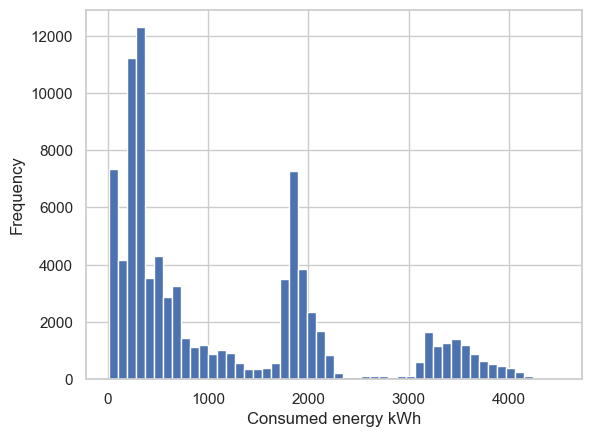

In [450]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "group.value"]["value_kwh"].plot.hist(bins=50)
plt.xlabel('Consumed energy kWh')
plt.show()

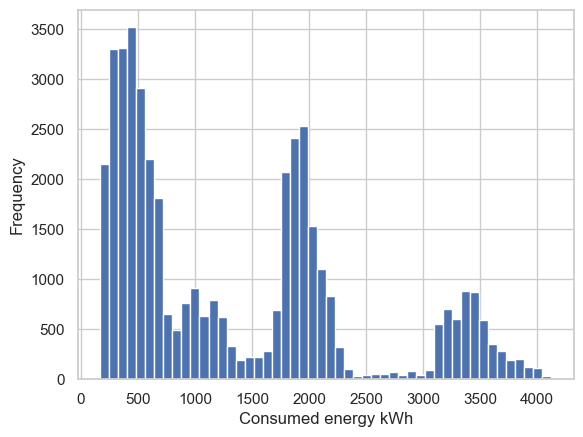

In [451]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "value.value"]["value_kwh"].plot.hist(bins=50)
plt.xlabel('Consumed energy kWh')
plt.show()

In [452]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "group.value"]["filename"].unique()

array(['data_electricity_ER01500242_None_265281745_2020-01-01_2020-12-31.csv',
       'data_electricity_ER01500242_None_265281745_2021-01-01_2021-12-31.csv',
       'data_electricity_ER01500242_None_265281745_2022-01-01_2022-12-31.csv',
       'data_electricity_LP00017070_None_1061695344_2020-01-01_2020-12-31.csv',
       'data_electricity_LP00017070_None_1061695344_2021-01-01_2021-12-31.csv',
       'data_electricity_LP00017070_None_1061695344_2022-01-01_2022-12-31.csv'],
      dtype=object)

In [453]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "value.value"]["filename"].unique()

array(['data_electricity_ER01500242_None_265281745_2022-01-01_2022-12-31.csv',
       'data_electricity_LP00017070_None_1061695344_2020-01-01_2020-12-31.csv',
       'data_electricity_LP00017070_None_1061695344_2021-01-01_2021-12-31.csv',
       'data_electricity_LP00017070_None_1061695344_2022-01-01_2022-12-31.csv'],
      dtype=object)

In [454]:
consumption_without_nan = consumption_without_nan[~((consumption_without_nan["fragment.series"] == "value.value") & (consumption_without_nan["fragment.series"] == "group.value"))]

In [455]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "dal.series"]["filename"].unique()

array(['data_electricity_EE00750779_720592_311680865_2020-01-01_2020-12-31.csv',
       'data_electricity_EE00750779_720592_311680865_2021-01-01_2021-12-31.csv',
       'data_electricity_EE00750779_720592_311680865_2022-01-01_2022-12-31.csv',
       'data_electricity_EE00750812_720239_311680858_2020-01-01_2020-12-31.csv',
       'data_electricity_EE00750812_720239_311680858_2021-01-01_2021-12-31.csv',
       'data_electricity_EE00750812_720239_311680858_2022-01-01_2022-12-31.csv',
       'data_electricity_EE00750826_720043_311680861_2020-01-01_2020-12-31.csv',
       'data_electricity_EE00750826_720043_311680861_2021-01-01_2021-12-31.csv',
       'data_electricity_EE00750826_720043_311680861_2022-01-01_2022-12-31.csv',
       'data_electricity_EE00750859_713413_311680862_2020-01-01_2020-12-31.csv',
       'data_electricity_EE00750859_713413_311680862_2021-01-01_2021-12-31.csv',
       'data_electricity_EE00750859_713413_311680862_2022-01-01_2022-12-31.csv',
       'data_electricity_EE0

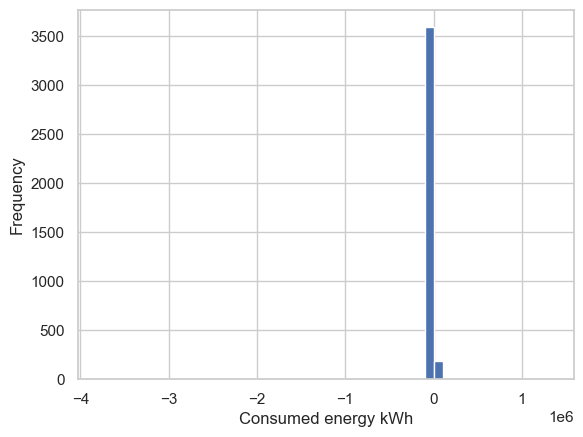

In [456]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "dal.series"]["value_kwh"].plot.hist(bins=50)
plt.xlabel('Consumed energy kWh')
plt.show()

In [458]:
consumption_without_nan[consumption_without_nan["value_kwh"] < 0]

,time,fragment.series,value_kwh,filename,id,etak_id,address_id,month,day,year
124818,2021-01-01T00:01:00.674Z,dal.series,-2113.20,data_electricity_EE00750779_720592_311680865_2...,311680865,720592,EE00750779,1,1,2021
124822,2021-05-01T00:11:09.492Z,dal.series,-13524.60,data_electricity_EE00750779_720592_311680865_2...,311680865,720592,EE00750779,5,1,2021
128628,2020-07-31T21:00:15.265Z,dal.series,-32350.40,data_electricity_EE00750859_713413_311680862_2...,311680862,713413,EE00750859,7,31,2020
128629,2020-08-31T21:00:15.150Z,dal.series,-32350.40,data_electricity_EE00750859_713413_311680862_2...,311680862,713413,EE00750859,8,31,2020
177646,2021-10-01T00:10:04.414Z,dal.series,-5822.32,data_electricity_EE00750914_721071_311680855_2...,311680855,721071,EE00750914,10,1,2021
574724,2020-07-06T09:00:50.110Z,dal.series,-3774617.00,data_electricity_EE01653334_720448_311680860_2...,311680860,720448,EE01653334,7,6,2020
643256,2021-06-30T21:10:06.327Z,dal.series,-32121.80,data_electricity_EE01744603_720593_311680864_2...,311680864,720593,EE01744603,6,30,2021
643680,2020-09-30T21:00:18.764Z,dal.series,-37564.10,data_electricity_EE01784194_715116_311680869_2...,311680869,715116,EE01784194,9,30,2020
643689,2021-07-31T21:10:32.513Z,dal.series,-55273.10,data_electricity_EE01784194_715116_311680869_2...,311680869,715116,EE01784194,7,31,2021
643896,2020-08-31T21:00:13.520Z,dal.series,-13148.60,data_electricity_EE01932953_720853_311680854_2...,311680854,720853,EE01932953,8,31,2020


In [459]:
consumption_without_nan[consumption_without_nan["value_kwh"] < 0][MONTH].value_counts()

month
7     5
8     2
1     1
5     1
10    1
6     1
9     1
Name: count, dtype: Int64

In [112]:
consumption_without_nan = consumption_without_nan[consumption_without_nan["value_kwh"] >= 0]

In [113]:
consumption_without_nan = consumption_without_nan[~((consumption_without_nan["fragment.series"] == "dal.series") & (consumption_without_nan["value_kwh"] > 15000))]

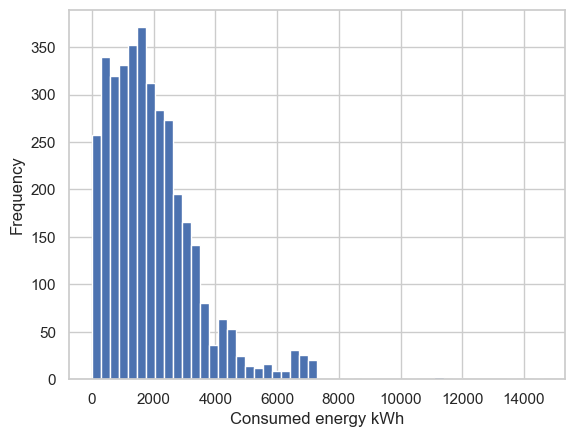

In [114]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "dal.series"]["value_kwh"].plot.hist(bins=50)
plt.xlabel('Consumed energy kWh')
plt.show()

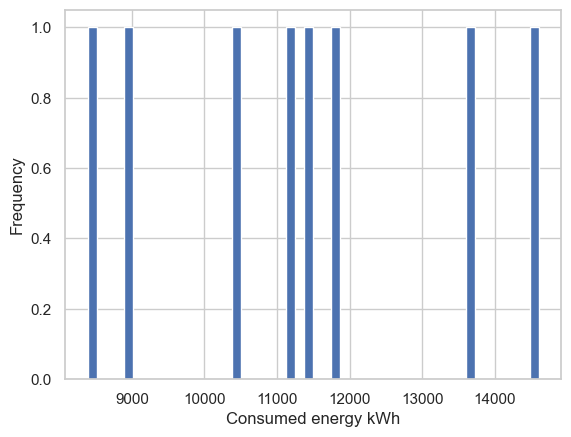

In [115]:
consumption_without_nan[(consumption_without_nan["fragment.series"] == "dal.series") & ((consumption_without_nan["value_kwh"] > 8000) & (consumption_without_nan["value_kwh"] < 15000))]["value_kwh"].plot.hist(bins=50)
plt.xlabel('Consumed energy kWh')
plt.show()

In [116]:
consumption_without_nan = consumption_without_nan[~((consumption_without_nan["fragment.series"] == "dal.series") & (consumption_without_nan["value_kwh"] > 8000))]

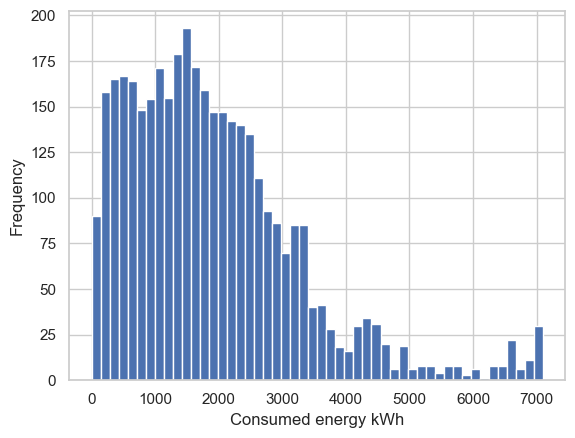

In [117]:
consumption_without_nan[consumption_without_nan["fragment.series"] == "dal.series"]["value_kwh"].plot.hist(bins=50)
plt.xlabel('Consumed energy kWh')
plt.show()

In [118]:
consumption_without_nan

,time,fragment.series,value_kwh,filename,id,etak_id,address_id,month,day,year
1,2021-06-17T22:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17,2021
2,2021-06-17T23:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17,2021
3,2021-06-18T00:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
4,2021-06-18T01:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
5,2021-06-18T02:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
...,...,...,...,...,...,...,...,...,...,...
2140166,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140167,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140168,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140169,2022-12-30T23:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022


In [119]:
number_of_duplicated_rows = consumption_without_nan[consumption_without_nan.duplicated(subset=["filename", "time"], keep=False)].shape[0]
number_of_duplicated_rows


1998702

In [120]:
print(f"{number_of_duplicated_rows / consumption_without_nan.shape[0] * 100:.2f}% of the rows are duplicated.")

93.68% of the rows are duplicated.


In [121]:
consumption_without_duplicates = consumption_without_nan.drop_duplicates(subset=["filename", "time"])

In [122]:
consumption_without_duplicates.shape[0]

573728

In [123]:
monthly_measurements_dal_series = consumption_without_duplicates[consumption_without_duplicates["fragment.series"] == "dal.series"].copy()


In [124]:
monthly_measurements_dal_series_filtered = monthly_measurements_dal_series.loc[
    monthly_measurements_dal_series.groupby(["filename", "month"])['value_kwh'].idxmax()
]

In [125]:
monthly_measurements_dal_series_filtered

,time,fragment.series,value_kwh,filename,id,etak_id,address_id,month,day,year
124811,2020-03-31T22:00:30.386Z,dal.series,3097.13,data_electricity_EE00750779_720592_311680865_2...,311680865,720592,EE00750779,3,31,2020
124812,2020-05-31T21:00:17.689Z,dal.series,87.00,data_electricity_EE00750779_720592_311680865_2...,311680865,720592,EE00750779,5,31,2020
124813,2020-07-31T21:00:21.457Z,dal.series,1480.60,data_electricity_EE00750779_720592_311680865_2...,311680865,720592,EE00750779,7,31,2020
124814,2020-08-31T21:00:22.477Z,dal.series,1480.60,data_electricity_EE00750779_720592_311680865_2...,311680865,720592,EE00750779,8,31,2020
124815,2020-09-30T21:00:18.670Z,dal.series,2529.70,data_electricity_EE00750779_720592_311680865_2...,311680865,720592,EE00750779,9,30,2020
...,...,...,...,...,...,...,...,...,...,...
644405,2022-08-31T21:10:33.031Z,dal.series,1701.76,data_electricity_EE02050632_720467_311680859_2...,311680859,720467,EE02050632,8,31,2022
644435,2022-09-30T21:10:54.421Z,dal.series,1728.12,data_electricity_EE02050632_720467_311680859_2...,311680859,720467,EE02050632,9,30,2022
644466,2022-10-31T22:10:26.885Z,dal.series,1939.43,data_electricity_EE02050632_720467_311680859_2...,311680859,720467,EE02050632,10,31,2022
644496,2022-11-30T22:10:24.771Z,dal.series,1840.29,data_electricity_EE02050632_720467_311680859_2...,311680859,720467,EE02050632,11,30,2022


In [126]:
monthly_measurements_dal_series_filtered.drop(columns=["time", "fragment.series", "id", "day"], inplace=True)

In [127]:
monthly_measurements_dal_series_filtered

,value_kwh,filename,etak_id,address_id,month,year
124811,3097.13,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,3,2020
124812,87.00,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,5,2020
124813,1480.60,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,7,2020
124814,1480.60,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,8,2020
124815,2529.70,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,9,2020
...,...,...,...,...,...,...
644405,1701.76,data_electricity_EE02050632_720467_311680859_2...,720467,EE02050632,8,2022
644435,1728.12,data_electricity_EE02050632_720467_311680859_2...,720467,EE02050632,9,2022
644466,1939.43,data_electricity_EE02050632_720467_311680859_2...,720467,EE02050632,10,2022
644496,1840.29,data_electricity_EE02050632_720467_311680859_2...,720467,EE02050632,11,2022


In [128]:
monthly_measurements_electricity_series = consumption_without_duplicates[consumption_without_duplicates["fragment.series"] == "electricity.o"].copy()

In [129]:
monthly_measurements_electricity_series

,time,fragment.series,value_kwh,filename,id,etak_id,address_id,month,day,year
1,2021-06-17T22:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17,2021
2,2021-06-17T23:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,17,2021
3,2021-06-18T00:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
4,2021-06-18T01:00:00.000Z,electricity.o,0.270,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
5,2021-06-18T02:00:00.000Z,electricity.o,0.271,data_electricity_EE00747913_718658_697182394_2...,697182394,718658,EE00747913,6,18,2021
...,...,...,...,...,...,...,...,...,...,...
2140156,2022-12-30T19:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140159,2022-12-30T20:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140162,2022-12-30T21:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022
2140165,2022-12-30T22:00:00.000Z,electricity.o,0.000,data_electricity_LP03604934_None_697182391_202...,697182391,None,LP03604934,12,30,2022


In [130]:
monthly_measurements_electricity_series.groupby(["filename", "month", "day"])["value_kwh"].sum().mean()

36.858651648005754

In [131]:
monthly_measurements_electricity_series.groupby(["filename", "month"])["value_kwh"].sum().mean()

937.8713432494279

In [132]:
monthly_measurements_electricity_series['num_days_in_month'] = monthly_measurements_electricity_series\
    .groupby(['filename', 'month'])['day']\
    .transform('nunique')


<Axes: >

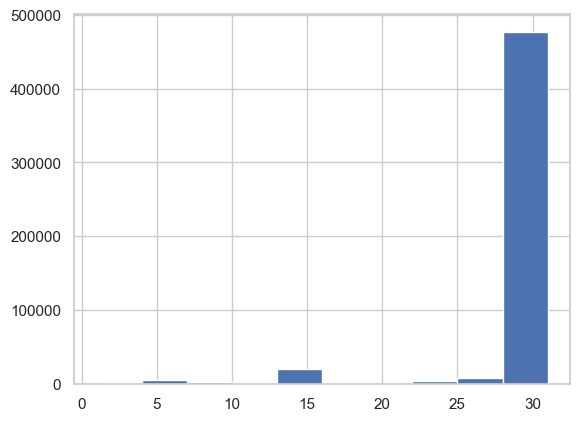

In [133]:
monthly_measurements_electricity_series['num_days_in_month'].hist()

In [134]:
monthly_measurements_electricity_series_filtered = monthly_measurements_electricity_series[monthly_measurements_electricity_series['num_days_in_month'] >= 25].copy()
monthly_measurements_electricity_series_filtered.drop(columns=['num_days_in_month'], inplace=True)

In [135]:
monthly_measurements_electricity_series_filtered.groupby(["filename", "month"])["value_kwh"].transform('sum')

303         203.297
310         203.297
317         203.297
324         203.297
331         203.297
             ...   
2140156    1436.621
2140159    1436.621
2140162    1436.621
2140165    1436.621
2140168    1436.621
Name: value_kwh, Length: 484503, dtype: float64

In [136]:
monthly_consumption_electricity_series = monthly_measurements_electricity_series_filtered.groupby(["filename", "month"]).agg({
    "value_kwh": 'sum'
})

In [137]:
monthly_consumption_electricity_series.reset_index(inplace=True)

In [138]:
monthly_consumption_electricity_series

,filename,month,value_kwh
0,data_electricity_EE00747913_718658_697182394_2...,7,203.297
1,data_electricity_EE00747913_718658_697182394_2...,8,202.044
2,data_electricity_EE00747913_718658_697182394_2...,9,194.942
3,data_electricity_EE00747913_718658_697182394_2...,10,201.035
4,data_electricity_EE00747913_718658_697182394_2...,11,194.475
...,...,...,...
673,data_electricity_LP03604934_None_697182391_202...,8,695.760
674,data_electricity_LP03604934_None_697182391_202...,9,754.508
675,data_electricity_LP03604934_None_697182391_202...,10,984.307
676,data_electricity_LP03604934_None_697182391_202...,11,1308.862


In [139]:
monthly_consumption_electricity_series["etak_id"] = monthly_consumption_electricity_series["filename"].str.split("_").str.get(3)
monthly_consumption_electricity_series["address_id"] = monthly_consumption_electricity_series["filename"].str.split("_").str.get(2)
monthly_consumption_electricity_series["year"] = get_year_vectorized(monthly_consumption_electricity_series.filename)

In [140]:
monthly_consumption_electricity_series

,filename,month,value_kwh,etak_id,address_id,year
0,data_electricity_EE00747913_718658_697182394_2...,7,203.297,718658,EE00747913,2021
1,data_electricity_EE00747913_718658_697182394_2...,8,202.044,718658,EE00747913,2021
2,data_electricity_EE00747913_718658_697182394_2...,9,194.942,718658,EE00747913,2021
3,data_electricity_EE00747913_718658_697182394_2...,10,201.035,718658,EE00747913,2021
4,data_electricity_EE00747913_718658_697182394_2...,11,194.475,718658,EE00747913,2021
...,...,...,...,...,...,...
673,data_electricity_LP03604934_None_697182391_202...,8,695.760,None,LP03604934,2022
674,data_electricity_LP03604934_None_697182391_202...,9,754.508,None,LP03604934,2022
675,data_electricity_LP03604934_None_697182391_202...,10,984.307,None,LP03604934,2022
676,data_electricity_LP03604934_None_697182391_202...,11,1308.862,None,LP03604934,2022


In [141]:
monthly_consumption_electricity_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filename    678 non-null    object 
 1   month       678 non-null    Int64  
 2   value_kwh   678 non-null    float64
 3   etak_id     678 non-null    object 
 4   address_id  678 non-null    object 
 5   year        678 non-null    int64  
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 32.6+ KB


In [142]:
monthly_consumption_electricity_series[["filename", "year"]].drop_duplicates()["year"].value_counts()


year
2021    67
2022    52
2020     1
Name: count, dtype: int64

In [143]:
electricity_consumption = pd.concat([monthly_measurements_dal_series_filtered, monthly_consumption_electricity_series])

In [144]:
electricity_consumption.reset_index(drop=True, inplace=True)

In [145]:
electricity_consumption

,value_kwh,filename,etak_id,address_id,month,year
0,3097.130,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,3,2020
1,87.000,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,5,2020
2,1480.600,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,7,2020
3,1480.600,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,8,2020
4,2529.700,data_electricity_EE00750779_720592_311680865_2...,720592,EE00750779,9,2020
...,...,...,...,...,...,...
1119,695.760,data_electricity_LP03604934_None_697182391_202...,None,LP03604934,8,2022
1120,754.508,data_electricity_LP03604934_None_697182391_202...,None,LP03604934,9,2022
1121,984.307,data_electricity_LP03604934_None_697182391_202...,None,LP03604934,10,2022
1122,1308.862,data_electricity_LP03604934_None_697182391_202...,None,LP03604934,11,2022


In [146]:
electricity_consumption["value_kwh"].describe()

count     1124.000000
mean      1893.584187
std       2229.171952
min          0.000000
25%        167.596000
50%       1467.474500
75%       2940.925000
max      15560.000000
Name: value_kwh, dtype: float64

<Axes: >

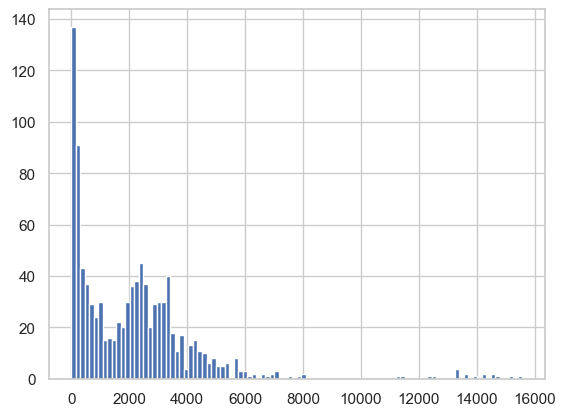

In [159]:
electricity_consumption["value_kwh"].hist(bins=100)

In [148]:
electricity_consumption[electricity_consumption["value_kwh"] == 0]["address_id"].unique().size

20

In [149]:
electricity_consumption = electricity_consumption[electricity_consumption["value_kwh"] > 1]

In [150]:
electricity_consumption["value_kwh"].describe()

count      990.000000
mean      2149.885277
std       2256.305967
min          3.077000
25%        379.425500
50%       1939.715000
75%       3111.365000
max      15560.000000
Name: value_kwh, dtype: float64

In [151]:
electricity_consumption["address_id"].unique().size

67

In [165]:
for group in electricity_consumption.groupby("year"):
    print(f"For year {group[0]}, there are {group[1]['address_id'].unique().size} unique builidngs.")

For year 2020, there are 18 unique builidngs.
For year 2021, there are 64 unique builidngs.
For year 2022, there are 63 unique builidngs.


In [152]:
electricity_consumption[electricity_consumption["value_kwh"] < 380]["address_id"].unique().size

40

In [475]:
electricity_consumption.to_csv(BUILDINGS_DIR.joinpath("real_electr_consumption.csv"), index=False)

In [166]:
electricity_consumption = pd.read_csv(BUILDINGS_DIR.joinpath("real_electr_consumption.csv"))

In [167]:
electricity_consumption

,value_kwh,filename,etak_id,address_id,month,year
0,3097.130,data_electricity_EE00750779_720592_311680865_2...,720592.0,EE00750779,3,2020
1,87.000,data_electricity_EE00750779_720592_311680865_2...,720592.0,EE00750779,5,2020
2,1480.600,data_electricity_EE00750779_720592_311680865_2...,720592.0,EE00750779,7,2020
3,1480.600,data_electricity_EE00750779_720592_311680865_2...,720592.0,EE00750779,8,2020
4,2529.700,data_electricity_EE00750779_720592_311680865_2...,720592.0,EE00750779,9,2020
...,...,...,...,...,...,...
985,695.760,data_electricity_LP03604934_None_697182391_202...,NaN,LP03604934,8,2022
986,754.508,data_electricity_LP03604934_None_697182391_202...,NaN,LP03604934,9,2022
987,984.307,data_electricity_LP03604934_None_697182391_202...,NaN,LP03604934,10,2022
988,1308.862,data_electricity_LP03604934_None_697182391_202...,NaN,LP03604934,11,2022


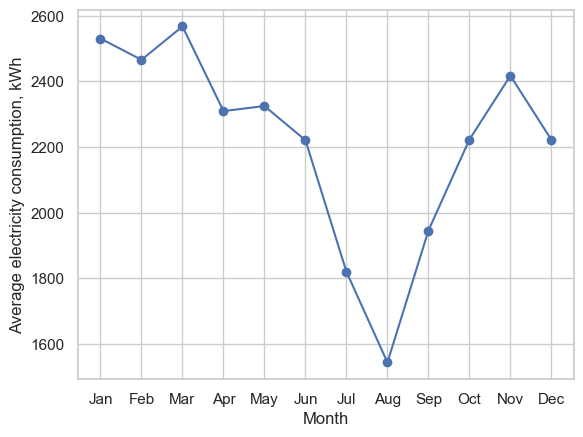

In [168]:
month_mean = []
months = range(1, 13)
for month in months:
    month_mean.append(electricity_consumption[electricity_consumption["month"] == month]["value_kwh"].mean())
    
months_abbr = list(calendar.month_abbr)[1:]
plt.plot(months, month_mean, '-o')
plt.xticks(months, months_abbr)
plt.xlabel("Month")
plt.ylabel("Average electricity consumption, kWh")
plt.grid(True)
plt.show()

In [170]:
for group in electricity_consumption.groupby("month"):
    print(f"For month {group[0]}, there are {group[1].size} measurements in total.")

For month 1, there are 336 measurements in total.
For month 2, there are 354 measurements in total.
For month 3, there are 426 measurements in total.
For month 4, there are 360 measurements in total.
For month 5, there are 420 measurements in total.
For month 6, there are 360 measurements in total.
For month 7, there are 714 measurements in total.
For month 8, there are 786 measurements in total.
For month 9, there are 498 measurements in total.
For month 10, there are 576 measurements in total.
For month 11, there are 600 measurements in total.
For month 12, there are 510 measurements in total.


In [233]:
buildings_full_year_consumption = electricity_consumption.groupby([ETAK_ID, "year"]).filter(lambda group: len(group) == 12)

In [235]:
print(f"Number of buildings with electricity consumption calculated for 12 months: {buildings_full_year_consumption.groupby(ETAK_ID).size().size}.")

Number of buildings with electricity consumption calculated for 12 months: 22.


In [226]:
estimated_production = pd.read_csv(BUILDINGS_DIR.joinpath("new_prod_with_metadata.csv"))

In [227]:
annual_consumption = buildings_full_year_consumption.groupby([ETAK_ID, "year"]).agg({
    "value_kwh": "sum"
}).reset_index()
annual_consumption.rename({"value_kwh": "consumption_kwh"}, axis=1, inplace=True)

In [228]:
estimated_balance = annual_consumption[[ETAK_ID, "consumption_kwh"]].merge(estimated_production, on=[ETAK_ID], how="left")

In [229]:
estimated_balance

,etak_id,consumption_kwh,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,...,residential,assembly,business,educational,industrial,institutional,mercantile,storage,other,predominant_orientation
0,643983.0,168228.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,710658.0,7413.553,164.100000,8.740000,13.670000,30.799352,3.400000,8.300000,15.000000,19.730000,...,0.705806,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,east
2,713413.0,30117.590,164.100000,8.740000,13.670000,250.787806,3.400000,8.300000,15.000000,19.730000,...,0.672315,0.0000,0.020448,0.000000,0.0,0.000000,0.019012,0.0,0.0,east
3,715116.0,31374.310,143.950000,6.120000,12.000000,262.744245,1.660000,5.010000,11.390000,17.620000,...,0.780001,0.0000,0.053613,0.000000,0.0,0.000000,0.000000,0.0,0.0,east
4,716647.0,29696.970,160.530000,8.215000,13.372500,513.180211,3.037500,7.627500,14.297500,19.360000,...,0.762272,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,none
5,718658.0,1906.322,151.000000,7.176667,12.583333,61.065802,2.376667,6.326667,12.773333,18.340000,...,0.621384,0.0000,0.000000,0.000000,0.0,0.000000,0.149396,0.0,0.0,north
6,719155.0,29180.420,155.265000,7.650000,12.935000,297.306046,2.742500,6.995000,13.565000,18.645000,...,0.599482,0.0000,0.000000,0.000000,0.0,0.000000,0.190696,0.0,0.0,east
7,719155.0,33693.880,155.265000,7.650000,12.935000,297.306046,2.742500,6.995000,13.565000,18.645000,...,0.599482,0.0000,0.000000,0.000000,0.0,0.000000,0.190696,0.0,0.0,east
8,719328.0,12250.667,152.060000,7.095000,12.675000,289.811133,2.300000,6.210000,12.750000,18.420000,...,0.645144,0.0000,0.000000,0.000000,0.0,0.000000,0.050357,0.0,0.0,south
9,719414.0,45213.910,143.230000,6.050000,11.940000,402.572038,1.620000,4.940000,11.290000,17.540000,...,0.788141,0.0000,0.000000,0.000000,0.0,0.056648,0.000000,0.0,0.0,east


In [216]:
estimated_balance = estimated_balance.loc[estimated_balance[ANNUAL_KWH_PV_M2].notna()]

In [217]:
estimated_balance[ANNUAL_KWH] = estimated_balance[ANNUAL_KWH_PV_M2] * estimated_balance["pv_suitable_area"] * 0.6

/var/folders/qh/h_r7ds2n5739vcmtmr409_lm0000gn/T/ipykernel_5315/2969873411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimated_balance[ANNUAL_KWH] = estimated_balance[ANNUAL_KWH_PV_M2] * estimated_balance["pv_suitable_area"] * 0.6


In [218]:
estimated_balance.describe()

,etak_id,consumption_kwh,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,...,residential,assembly,business,educational,industrial,institutional,mercantile,storage,other,annual_kwh
count,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.000000,20.0,20.0,20.000000
mean,2.220766e+06,21489.879850,152.697395,7.240917,12.723304,578.019270,2.412328,6.424511,12.966098,18.481337,...,0.656872,0.000185,0.047257,0.018369,0.0,0.0,0.045857,0.0,0.0,55035.788679
std,2.692519e+06,15837.145566,9.253032,1.131992,0.769187,1419.940270,0.736862,1.401564,1.545730,1.039581,...,0.241419,0.000827,0.115585,0.082148,0.0,0.0,0.120799,0.0,0.0,138236.262076
min,7.106580e+05,57.670000,132.130000,5.270000,11.010000,30.799352,1.340000,4.210000,10.340000,15.790000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,3032.504185
25%,7.192848e+05,7810.393750,145.422500,6.225000,12.120000,92.539537,1.735000,5.152500,11.607500,17.712500,...,0.639204,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,7577.949005
50%,7.205300e+05,22468.915000,152.755000,7.127500,12.732500,244.565300,2.300000,6.240000,12.786667,18.465000,...,0.726482,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,22318.720773
75%,1.968314e+06,30431.770000,161.694891,8.469167,13.471522,306.202449,3.238043,7.974746,14.634384,19.440435,...,0.798282,0.000000,0.024516,0.000000,0.0,0.0,0.004753,0.0,0.0,28495.803376
max,7.495176e+06,60987.840000,164.100000,8.740000,13.670000,6535.374345,3.400000,8.300000,15.000000,19.730000,...,0.854793,0.003700,0.472582,0.367379,0.0,0.0,0.507670,0.0,0.0,634805.346735


<Axes: >

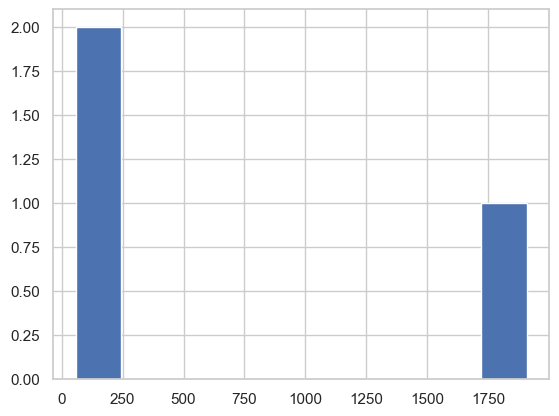

In [206]:
estimated_balance[estimated_balance["consumption_kwh"] < 7000]["consumption_kwh"].hist()

<Axes: >

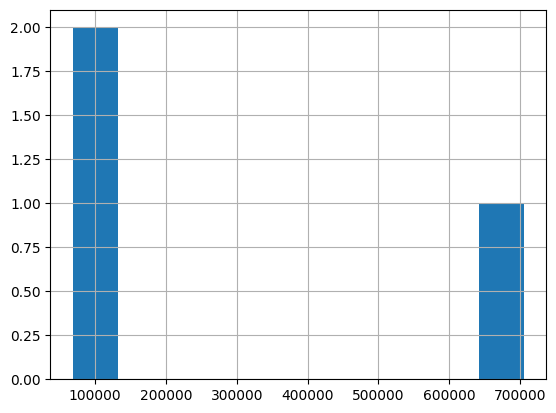

In [489]:
estimated_balance[estimated_balance[ANNUAL_KWH] > 60000][ANNUAL_KWH].hist()

In [207]:
estimated_balance = estimated_balance.loc[estimated_balance[ANNUAL_KWH] < 600000]

In [208]:
estimated_balance = estimated_balance.loc[estimated_balance["consumption_kwh"] > 7000]

In [219]:
estimated_balance[ADDRESS] = estimated_balance[ADDRESS].str.split(", ").str[0]

/var/folders/qh/h_r7ds2n5739vcmtmr409_lm0000gn/T/ipykernel_5315/2202759377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimated_balance[ADDRESS] = estimated_balance[ADDRESS].str.split(", ").str[0]


In [ ]:
melted_data = pd.melt(estimated_balance, id_vars=ADDRESS, value_vars=[ANNUAL_KWH, 'consumption_kwh'], var_name='Buildings', value_name='Production/consumption')
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.barplot(x=ADDRESS, y='Production/consumption', hue='Buildings', data=melted_data)

new_labels = ['Prodution', 'Consumption']
for t, l in zip(ax.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('Buildings')
plt.ylabel('Production/consumption, kWh')
plt.title('Solar production to electricity consumption balance (full year)')
plt.xticks(rotation=90)
plt.show()

In [495]:
estimated_balance["percentage"] = estimated_balance[ANNUAL_KWH] / estimated_balance["consumption_kwh"] * 100

In [496]:
estimated_balance

,etak_id,consumption_kwh,annual_kwh/pv_m2,y-y_variation/pv_m2,monthly_average_kwh/pv_m2,pv_suitable_area,Jan_kwh/pv_m2,Feb_kwh/pv_m2,Mar_kwh/pv_m2,Apr_kwh/pv_m2,...,educational,industrial,institutional,mercantile,other,residential,storage,predominant_orientation,annual_kwh,percentage
0,643983.0,168228.000,173.580000,8.544000,14.464000,335.659252,3.012000,7.770000,15.104000,20.964000,...,0.0,0.0,0.0,0.000000,0.0,0.129225,0.0,none,34958.239802,20.780274
1,710658.0,7413.553,182.330000,9.710000,15.190000,30.799352,3.780000,9.220000,16.670000,21.930000,...,0.0,0.0,0.0,0.000000,0.0,0.705806,0.0,east,3369.387496,45.449024
2,713413.0,30117.590,182.330000,9.710000,15.190000,250.787806,3.780000,9.220000,16.670000,21.930000,...,0.0,0.0,0.0,0.019012,0.0,0.672315,0.0,east,27435.684424,91.095219
3,715116.0,31374.310,159.950000,6.800000,13.330000,262.744245,1.840000,5.570000,12.660000,19.580000,...,0.0,0.0,0.0,0.000000,0.0,0.780001,0.0,east,25215.565181,80.370103
5,719155.0,33693.880,172.512500,8.500000,14.375000,297.306046,3.047500,7.770000,15.072500,20.722500,...,0.0,0.0,0.0,0.190696,0.0,0.599482,0.0,east,30773.405596,91.332330
6,719328.0,12250.667,168.960000,7.880000,14.080000,289.811133,2.555000,6.895000,14.170000,20.460000,...,0.0,0.0,0.0,0.050357,0.0,0.645144,0.0,south,29379.893469,239.822807
7,719935.0,27928.710,170.500000,7.810000,14.210000,238.342795,2.470000,6.790000,14.220000,20.570000,...,0.0,0.0,0.0,0.000000,0.0,0.511436,0.0,south,24382.467907,87.302521
8,720043.0,40329.330,164.060000,7.170000,13.670000,271.145903,2.050000,6.000000,13.220000,20.040000,...,0.0,0.0,0.0,0.000000,0.0,0.762310,0.0,west,26690.518103,66.181407
9,720448.0,39330.080,171.860000,7.960000,14.320000,332.891657,2.560000,6.970000,14.420000,20.750000,...,0.0,0.0,0.0,0.000000,0.0,0.712978,0.0,south,34326.456131,87.277870
10,720467.0,19166.838,158.750000,6.680000,13.230000,236.358032,1.780000,5.440000,12.500000,19.440000,...,0.0,0.0,0.0,0.000000,0.0,0.818527,0.0,east,22513.102540,117.458615


In [497]:
estimated_balance[["consumption_kwh", ANNUAL_KWH, "percentage"]].describe()

,consumption_kwh,annual_kwh,percentage
count,17.000000,17.000000,17.000000
mean,34444.072176,31394.523366,151.539518
std,37099.514387,24823.752481,205.907272
min,7352.252000,3369.387496,20.780274
25%,19166.838000,22513.102540,66.181407
50%,27928.710000,26690.518103,87.302521
75%,33693.880000,34326.456131,105.794307
max,168228.000000,108439.585968,866.642155


In [500]:
estimated_balance[estimated_balance["percentage"] < 200]["percentage"].mean()

75.5693282591503

In [480]:
real_production = pd.read_csv(MONTHLY_REAL_PROD)

In [481]:
real_production

,etak_id,pv_area_m2,source,address,monthly_production_kwh,month,year
0,719155,195.82,540121820,Tiigi 19,1655.56,3,2021
1,719155,195.82,540121820,Tiigi 19,3691.71,4,2021
2,719155,195.82,540121820,Tiigi 19,4160.20,5,2021
3,719155,195.82,540121820,Tiigi 19,5914.39,6,2021
4,719155,195.82,540121820,Tiigi 19,5766.83,7,2021
...,...,...,...,...,...,...,...
273,720592,168.47,547236080,Kalevi 8,2946.33,7,2022
274,720592,168.47,547236080,Kalevi 8,2486.11,8,2022
275,720592,168.47,547236080,Kalevi 8,1381.96,9,2022
276,720592,168.47,547236080,Kalevi 8,608.07,10,2022


In [482]:
average_df = real_production[real_production[MONTH].isin([1, 11])].groupby([ETAK_ID, YEAR, ADDRESS], as_index=False)['monthly_production_kwh'].mean()
average_df[MONTH] = 12


In [483]:
result_df = pd.concat([real_production, average_df], ignore_index=True)

In [382]:
# balance = real_production[[ETAK_ID, "month", "year", "monthly_production_kwh", ADDRESS]].merge(electricity_consumption[[ETAK_ID, "address_id", "month", "year", "value_kwh"]], on=[ETAK_ID, "year", "month"])

In [484]:
balance = result_df[[ETAK_ID, MONTH, YEAR, "monthly_production_kwh", ADDRESS]].merge(electricity_consumption[[ETAK_ID, "address_id", MONTH, YEAR, "value_kwh"]], on=[ETAK_ID, YEAR, MONTH])

In [485]:
balance["percentage"] = balance["monthly_production_kwh"] / balance["value_kwh"] * 100

In [486]:
balance

,etak_id,month,year,monthly_production_kwh,address,address_id,value_kwh,percentage
0,719155,3,2021,1655.560,Tiigi 19,EE01752838,2840.00,58.294366
1,719155,4,2021,3691.710,Tiigi 19,EE01752838,2420.70,152.505887
2,719155,5,2021,4160.200,Tiigi 19,EE01752838,2342.50,177.596585
3,719155,6,2021,5914.390,Tiigi 19,EE01752838,1937.30,305.290353
4,719155,7,2021,5766.830,Tiigi 19,EE01752838,2106.50,273.763589
...,...,...,...,...,...,...,...,...
261,720593,12,2022,135.095,Tiigi 23,EE01744603,1986.24,6.801545
262,720853,12,2021,147.935,Tiigi 21,EE01932953,1816.36,8.144586
263,720853,12,2022,137.630,Tiigi 21,EE01932953,1654.03,8.320889
264,721107,12,2021,641.950,Aleksandri 12,EE00750871,5628.20,11.405956


In [487]:
balance[["monthly_production_kwh", "value_kwh", "percentage"]].describe()

,monthly_production_kwh,value_kwh,percentage
count,266.000000,266.000000,266.000000
mean,2203.193816,2955.689902,81.365961
std,1939.047700,1037.892166,71.972663
min,2.490000,1174.430000,0.065866
25%,309.605000,2236.535000,10.755854
50%,1901.090000,2908.280000,71.973128
75%,3576.817500,3352.682500,132.000089
max,8312.350000,6927.870000,305.290353


In [ ]:
# balance.groupby(["address_id", "year"]).filter(lambda group: len(group) == 11).groupby("address_id")[["monthly_production_kwh", "value_kwh"]].count()


In [488]:
balance.groupby(["address_id", YEAR]).filter(lambda group: len(group) == 12).groupby("address_id")[["monthly_production_kwh", "value_kwh"]].count()


,monthly_production_kwh,value_kwh
address_id,,
EE00750826,12,12
EE00750859,12,12
EE00750871,12,12
EE01653334,12,12
EE01744603,12,12
EE01752838,12,12
EE01784194,12,12
EE01932953,12,12
EE02050632,12,12


In [401]:
# monthly_balance_filtered = balance.groupby(["address_id", "year", ADDRESS]).filter(lambda group: len(group) == 11)

In [489]:
monthly_balance_filtered = balance.groupby(["address_id", YEAR, ADDRESS]).filter(lambda group: len(group) == 12)

In [ ]:
# monthly_balance_filtered["month"].value_counts()

In [490]:
monthly_balance_filtered["month"].value_counts()

month
1     9
2     9
3     9
4     9
5     9
6     9
7     9
8     9
9     9
10    9
11    9
12    9
Name: count, dtype: int64

In [405]:
# monthly_balance_filtered["value_kwh"].mean()

2778.316545454545

In [391]:
# annual_balance = monthly_balance_filtered.groupby(["address_id", "year", ADDRESS]).agg({
#     "monthly_production_kwh": "sum",
#     "value_kwh": "sum"
# }).reset_index()
# annual_balance.rename({"monthly_production_kwh": "production_kwh", "value_kwh": "consumption_kwh"}, axis=1, inplace=True)

In [491]:
annual_balance = monthly_balance_filtered.groupby(["address_id", "year", ADDRESS]).agg({
    "monthly_production_kwh": "sum",
    "value_kwh": "sum"
}).reset_index()
annual_balance.rename({"monthly_production_kwh": "production_kwh", "value_kwh": "consumption_kwh"}, axis=1, inplace=True)

In [492]:
annual_balance["percentage"] = annual_balance["production_kwh"] / annual_balance["consumption_kwh"] * 100

In [493]:
annual_balance

,address_id,year,address,production_kwh,consumption_kwh,percentage
0,EE00750826,2022,Aleksandri 3,23294.745,40329.330,57.761299
1,EE00750859,2022,Turu 3,24916.415,30117.590,82.730441
2,EE00750871,2022,Aleksandri 12,45938.085,60987.840,75.323351
3,EE01653334,2022,J.Kuperjanovi 2,29112.445,39330.080,74.020813
4,EE01744603,2022,Tiigi 23,25905.005,24000.020,107.937431
5,EE01752838,2022,Tiigi 19,33314.145,33693.880,98.872985
6,EE01784194,2022,Turu 9,23880.290,31374.310,76.114152
7,EE01932953,2022,Tiigi 21,23471.390,20937.810,112.100501
8,EE02050632,2022,Pepleri 3,19966.335,19166.838,104.171251


In [ ]:
# annual_balance["percentage"].mean()

In [ ]:
# annual_balance["consumption_kwh"].mean()

In [ ]:
# melted_data = pd.melt(annual_balance, id_vars=ADDRESS, value_vars=['production_kwh', 'consumption_kwh'], var_name='Buildings', value_name='Production/consumption')

# ax = sns.barplot(x=ADDRESS, y='Production/consumption', hue='Buildings', data=melted_data, palette='viridis_r')

# new_labels = ['Prodution', 'Consumption']
# for t, l in zip(ax.legend_.texts, new_labels):
#     t.set_text(l)

# ax.legend_.set_title("")
# plt.xlabel('Buildings', fontsize=12)
# plt.ylabel('Production and consumption, kWh', fontsize=12)
# plt.title('Solar production to electricity consumption balance (11 months period)', fontsize=14)
# plt.xticks(rotation=60)
# plt.show()

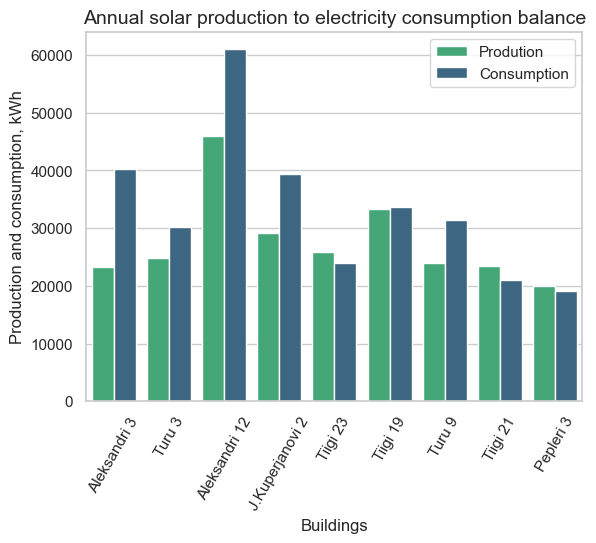

In [494]:
melted_data = pd.melt(annual_balance, id_vars=ADDRESS, value_vars=['production_kwh', 'consumption_kwh'], var_name='Buildings', value_name='Production/consumption')

ax = sns.barplot(x=ADDRESS, y='Production/consumption', hue='Buildings', data=melted_data, palette='viridis_r')

new_labels = ['Prodution', 'Consumption']
for t, l in zip(ax.legend_.texts, new_labels):
    t.set_text(l)

ax.legend_.set_title("")
plt.xlabel('Buildings', fontsize=12)
plt.ylabel('Production and consumption, kWh', fontsize=12)
plt.title('Annual solar production to electricity consumption balance', fontsize=14)
plt.xticks(rotation=60)
plt.show()

In [338]:
annual_consumption = 465831
ratio_list = [0.4, 0.5, 0.6, 0.7, 0.8]
labels = []


In [339]:
annual_balance_list = []
for ratio in ratio_list: 
    total = estimated_production[ANNUAL_KWH_PV_M2] * estimated_production["pv_suitable_area"] * ratio
    annual_balance_list.append((total.sum() / 1000) * 100 / annual_consumption)
    labels.append(f"{int(ratio * 100)}%")
    

In [341]:
estimated_production[ETAK_ID].unique().size

16757

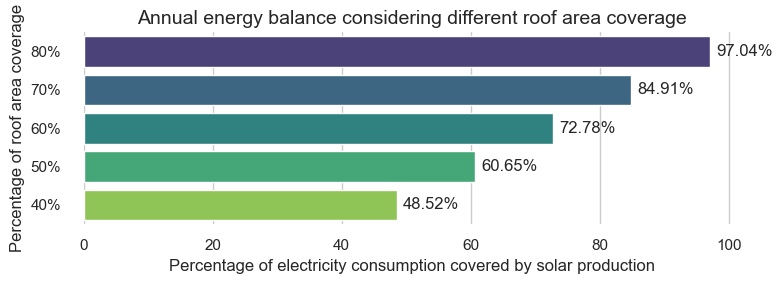

In [340]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(8, 3))

sns.barplot(x=annual_balance_list, y=labels, palette='viridis_r')

for index, value in enumerate(annual_balance_list):
    plt.text(value + 1, index, f'{value:.2f}%', va='center', fontsize=12)

sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

plt.title('Annual energy balance considering different roof area coverage', fontsize=14)
plt.xlabel('Percentage of electricity consumption covered by solar production', fontsize=12)
plt.ylabel('Percentage of roof area coverage', fontsize=12)
plt.tight_layout()
plt.show()

In [342]:
monthly_2021 = [47689.783, 44798.453, 42742.424, 36444.05, 36654.951, 34936.819, 36638.355, 35110.844, 36978.963, 39544.316, 42153.186, 47916.428]

In [347]:
ratio_list = [0.4, 0.8]
labels = []

In [371]:
monthly_balance_df = pd.DataFrame(MONTHS_ABBR, columns=["Month"])
for ratio in ratio_list: 
    monthly_full_area = estimated_production[MONTHS_ABBR_UNITS_PV_M2].mul(estimated_production["pv_suitable_area"] * ratio, axis=0)
    monthly_totals = monthly_full_area.sum() / 1000
    monthly_totals_percentage = monthly_totals / monthly_2021 * 100
    monthly_balance_df[f"{str(int(ratio * 100))}%"] = monthly_totals_percentage.values
    

In [372]:
monthly_balance_df

,Month,40%,80%
0,Jan,8.870464,17.740929
1,Feb,23.756619,47.513237
2,Mar,46.925207,93.850414
3,Apr,74.732518,149.465036
4,May,92.016149,184.032297
5,Jun,92.889663,185.779327
6,Jul,88.413113,176.826226
7,Aug,78.997290,157.994580
8,Sep,54.566343,109.132686
9,Oct,27.800683,55.601366


In [373]:
monthly_balance_df_melted = monthly_balance_df.melt(id_vars=['Month'], value_vars=['40%', '80%'], var_name='Roof area coverage', value_name='Value')


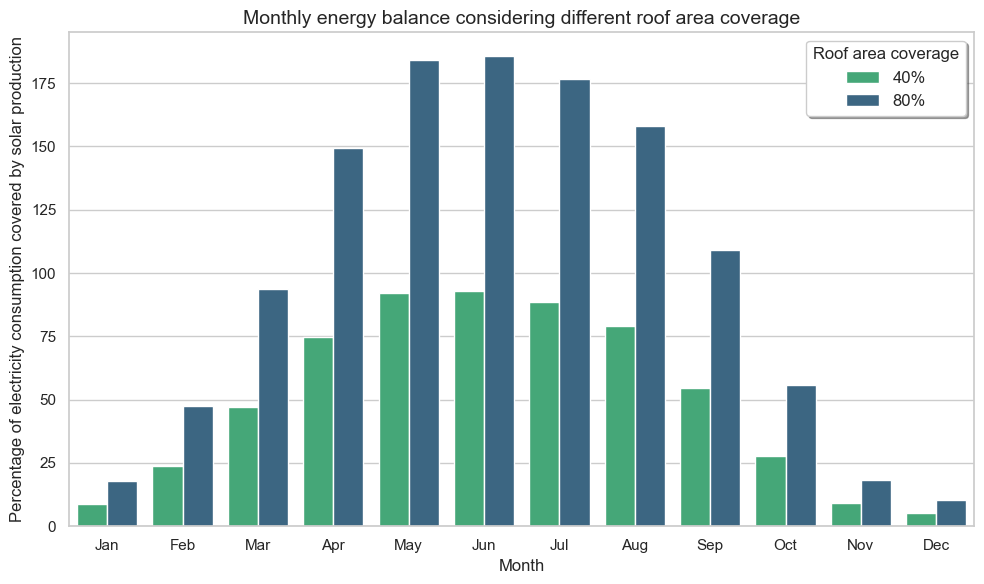

In [379]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Month', y='Value', hue='Roof area coverage', data=monthly_balance_df_melted, palette='viridis_r')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage of electricity consumption covered by solar production', fontsize=12)
plt.title('Monthly energy balance considering different roof area coverage', fontsize=14)

plt.legend(title='Roof area coverage', title_fontsize=12, fontsize=12, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()


In [240]:
mapped_buildings = pd.read_csv(BUILDINGS_DIR.joinpath("buildinfs_filtered_metadata.csv"))


In [241]:
mapped_buildings.columns

Index(['etak_id', 'lat', 'lon', 'total_roof_area', 'district', 'ehr_code',
       'address_id', 'address', 'name', 'type', 'year', 'total_area', 'floors',
       'energy_label', 'residential', 'assembly', 'business', 'educational',
       'industrial', 'institutional', 'mercantile', 'storage', 'other'],
      dtype='object')

In [248]:
mapped_buildings.rename(columns={"year": "construction_year"}, inplace=True)

In [258]:
mapped_buildings.shape[0]

17543

In [304]:
merged_df = electricity_consumption.merge(
    mapped_buildings,
    on=ETAK_ID, 
    how="left"
)

In [305]:
merged_df.replace(0, np.nan, inplace=True)


In [306]:
merged_df.columns

Index(['value_kwh', 'filename', 'etak_id', 'address_id_x', 'month', 'year',
       'lat', 'lon', 'total_roof_area', 'district', 'ehr_code', 'address_id_y',
       'address', 'name', 'type', 'construction_year', 'total_area', 'floors',
       'energy_label', 'residential', 'assembly', 'business', 'educational',
       'industrial', 'institutional', 'mercantile', 'storage', 'other'],
      dtype='object')

In [307]:
merged_df.rename(columns={"address_id_x": "address_id"}, inplace=True)
merged_df.drop(columns="address_id_y", inplace=True)

In [308]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   value_kwh          990 non-null    float64
 1   filename           990 non-null    object 
 2   etak_id            692 non-null    float64
 3   address_id         990 non-null    object 
 4   month              990 non-null    int64  
 5   year               990 non-null    int64  
 6   lat                655 non-null    float64
 7   lon                655 non-null    float64
 8   total_roof_area    655 non-null    float64
 9   district           655 non-null    object 
 10  ehr_code           655 non-null    float64
 11  address            650 non-null    object 
 12  name               655 non-null    object 
 13  type               655 non-null    object 
 14  construction_year  655 non-null    float64
 15  total_area         655 non-null    float64
 16  floors             655 non

In [312]:
for column in ['residential', 'assembly', 'business', 'educational', 'industrial', 'institutional', 'mercantile', 'storage', 'other']:
    partial_df = merged_df[[ETAK_ID, column]]
    print(f"There are {partial_df[partial_df[column].notna()][ETAK_ID].unique().size} buildings that have {column} area.")

There are 30 buildings that have residential area.
There are 1 buildings that have assembly area.
There are 8 buildings that have business area.
There are 1 buildings that have educational area.
There are 0 buildings that have industrial area.
There are 1 buildings that have institutional area.
There are 7 buildings that have mercantile area.
There are 0 buildings that have storage area.
There are 0 buildings that have other area.
